# Data source: 
# https://github.com/BloombergGraphics/2024-h1b-immigration-data/tree/main

## This data was produced by the U.S. Citizenship and Immigration Services, an agency under DHS tasked with adjudicating H-1B petitions.

In [4]:
import sys
!{sys.executable} -m pip install pandas

In [5]:
import sys
!{sys.executable} -m pip install matplotlib

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df= pd.read_csv("./h1b.csv")

/var/folders/ld/7dyzlyvx5wd6652g56np5wt40000gn/T/ipykernel_23244/3796549116.py:1: DtypeWarning: Columns (4,7,14,16,29,40,44,50,51,52,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("./h1b.csv")


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474421 entries, 0 to 474420
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   bcn                       474421 non-null  object
 1   country_of_birth          474421 non-null  object
 2   country_of_nationality    474421 non-null  object
 3   ben_date_of_birth         474421 non-null  object
 4   ben_year_of_birth         474421 non-null  object
 5   gender                    474421 non-null  object
 6   employer_name             474421 non-null  object
 7   FEIN                      474421 non-null  object
 8   mail_addr                 474421 non-null  object
 9   city                      474421 non-null  object
 10  state                     474421 non-null  object
 11  zip                       474421 non-null  object
 12  agent_first_name          474158 non-null  object
 13  agent_last_name           473423 non-null  object
 14  lott

In [6]:
df.describe()

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,S1Q1B,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,BEN_COMP_PAID,DOT_CODE,NAICS_CODE,S3Q1,S4Q1,T_U_VAWA_FLAG
count,474421,474421,474421,474421,474421,474421,474421,474421,474421,474421,...,60294,58620,58620,94160,91537,92622,94072,94287,94290,37
unique,2,209,186,2,150,3,44939,59267,38764,4036,...,3,10,10,13110,15717,208,2609,4,3,1
top,(b)(6),IND,IND,(b)(6),1994,male,Infosys Limited,581760235,2400 N Glenville Dr,Richardson,...,N,F,BACHELOR'S DEGREE,COMPUTER SCIENCE,80000,030,541511,B,N,(b)(3) (b)(6) (b)(7)(c)
freq,474384,365980,364163,474384,24423,326362,16347,11783,16491,17710,...,60221,37139,37139,11331,1491,40344,26777,72126,76883,37


## Question1: Who applies the most?

In [10]:
df["country_of_birth"].value_counts()

country_of_birth
IND    365980
CHN     35110
CAN      4416
PHL      4353
MEX      4298
        ...  
PRI         1
GNB         1
GGY         1
GIB         1
MSR         1
Name: count, Length: 209, dtype: int64

hmm, Ind >> CHN. need to check the single lottery

<Axes: ylabel='country_of_birth'>

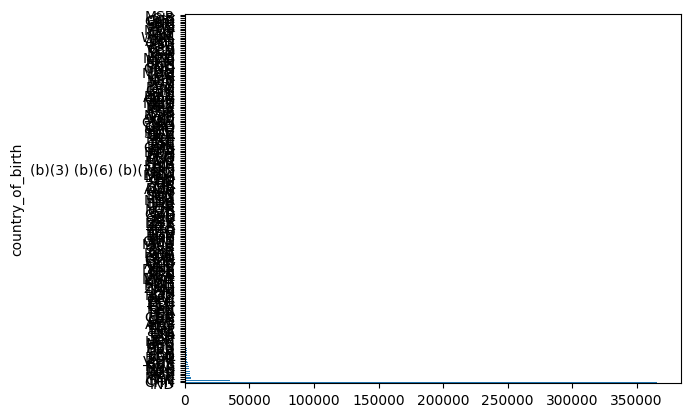

In [12]:
df["country_of_birth"].value_counts().plot(kind="barh")

In [43]:
df_single= pd.read_csv("./h1b_single.csv")

/var/folders/ld/7dyzlyvx5wd6652g56np5wt40000gn/T/ipykernel_23244/304776933.py:1: DtypeWarning: Columns (4,7,14,16,29,40,44,50,51,52,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_single= pd.read_csv("./h1b_single.csv")


In [26]:
df_multi= pd.read_csv("./h1b_multi.csv")

/var/folders/ld/7dyzlyvx5wd6652g56np5wt40000gn/T/ipykernel_88387/4010458486.py:1: DtypeWarning: Columns (4,7,14,16,29,40,44,50,51,52,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_multi= pd.read_csv("./h1b_multi.csv")


In [45]:
df_single["country_of_birth"].value_counts()

country_of_birth
IND    365980
CHN     35110
CAN      4416
PHL      4353
MEX      4298
        ...  
PRI         1
GNB         1
GGY         1
GIB         1
MSR         1
Name: count, Length: 209, dtype: int64

In [47]:
df_multi["country_of_birth"].value_counts()

country_of_birth
IND    392583
CHN      7560
NPL      1469
PAK      1459
PHL       768
        ...  
AND         1
SYC         1
HUN         1
PRY         1
NOR         1
Name: count, Length: 133, dtype: int64

In [27]:
#cleared the csv manually with less columns

df_s= pd.read_csv("./h1b-Copy1.csv")

#after office hours: seems to be problematic. redid

/var/folders/ld/7dyzlyvx5wd6652g56np5wt40000gn/T/ipykernel_88387/2556138688.py:3: DtypeWarning: Columns (2,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s= pd.read_csv("./h1b-Copy1.csv")


In [28]:
columns_to_keep = [ 'country_of_birth','country_of_nationality', 'ben_year_of_birth', 'gender', 'employer_name', 'city', 'state', 'agent_first_name','agent_last_name','status_type','ben_multi_reg_ind'] 
df_selected = df_multi[columns_to_keep]
#okay this doesn't work either. I'll go with what Chat told me.

,country_of_birth,country_of_nationality,ben_year_of_birth,gender,employer_name,city,state,agent_first_name,agent_last_name,status_type,ben_multi_reg_ind
0,IND,NOR,1985,female,Lancesoft Inc.,Herndon,VA,Alyssa,Wagner,ELIGIBLE,1
1,IND,IND,1997,male,Itechmatics Inc,Santa Ana,CA,Duraisamy Anand,Velusamy,SELECTED,1
2,IND,IND,1995,male,Dataquad Inc.,Houston,TX,Sumanth,Sunkir,ELIGIBLE,1
3,IND,IND,1980,male,Mejenta Systems Inc,Southfield,MI,Nicole,Cerezo,ELIGIBLE,1
4,IND,IND,1991,male,Codersdoor LLC,Irving,TX,Santhosh,Bommakanti,ELIGIBLE,1
...,...,...,...,...,...,...,...,...,...,...,...
408886,IND,IND,1997,female,MERIDIANSOFT INC,Lewis Center,OH,KRISHNA,CHINTALAPATI,ELIGIBLE,1
408887,IND,IND,1997,male,NerdPine Solutions LLC,Hillsboro,OR,Srinivasa Rao,Gubbala,ELIGIBLE,1
408888,IND,IND,1992,male,INFODATAWORX LLC,Mckinney,TX,Amulya Reddy,Madhavareddygari,ELIGIBLE,1
408889,IND,IND,1992,female,"I Brain Solutions, LLC",Piscataway,NJ,Sunil,Yanamadala,ELIGIBLE,1


In [15]:
df_s["country_of_birth"].value_counts()

country_of_birth
IND    365980
CHN     35110
CAN      4416
PHL      4353
MEX      4298
        ...  
PRI         1
GNB         1
GGY         1
GIB         1
MSR         1
Name: count, Length: 209, dtype: int64

In [17]:
# compared to 365980, 1000 is a good dividing line
filtered_cob_value = cob_value_counts[cob_value_counts >= 1000]
print(filtered_cob_value)

country_of_birth
IND    365980
CHN     35110
CAN      4416
PHL      4353
MEX      4298
PAK      3800
KOR      3714
NPL      3580
TWN      3322
BRA      2843
NGA      2204
GBR      2042
RUS      1749
VNM      1670
TUR      1620
BGD      1491
COL      1345
IRN      1291
FRA      1284
UKR      1232
DEU      1009
Name: count, dtype: int64


<Axes: ylabel='country_of_birth'>

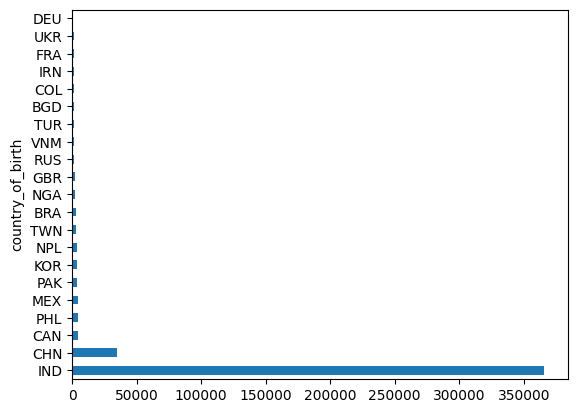

In [18]:
filtered_cob_value.plot(kind="barh")

<Axes: xlabel='country_of_birth'>

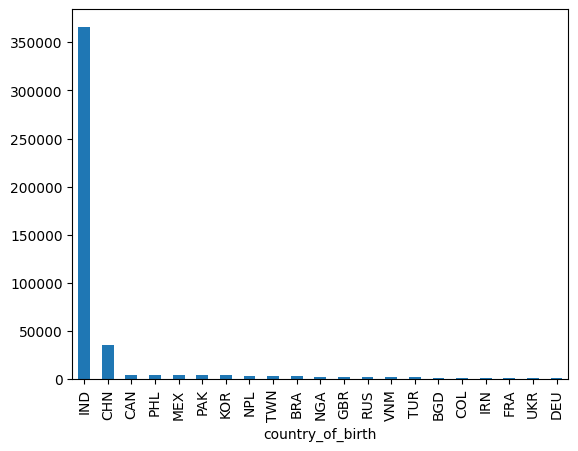

In [100]:
filtered_cob_value.plot(kind="bar",y="country_of_birth") #better for my neck

## Conclusion1: In any case, India has the most applicants. 

## Question2: Lottery rate?

In [66]:
df_s["status_type"].value_counts()

status_type
ELIGIBLE                   346821
SELECTED                   127563
(b)(3) (b)(6) (b)(7)(c)        37
Name: count, dtype: int64

In [75]:
applicants=df_s["status_type"].value_counts()

# Extract counts for 'SELECTED' and 'ELIGIBLE' <- from chat as I don't know how to get the value correlated to the type
selected_count = applicants.get("SELECTED", 0)  # Default to 0 if not found
eligible_count = applicants.get("ELIGIBLE", 0)  # Default to 0 if not found

ratio = selected_count / (selected_count + eligible_count)
print(ratio)

0.26890240817565514


<Axes: xlabel='country_of_birth'>

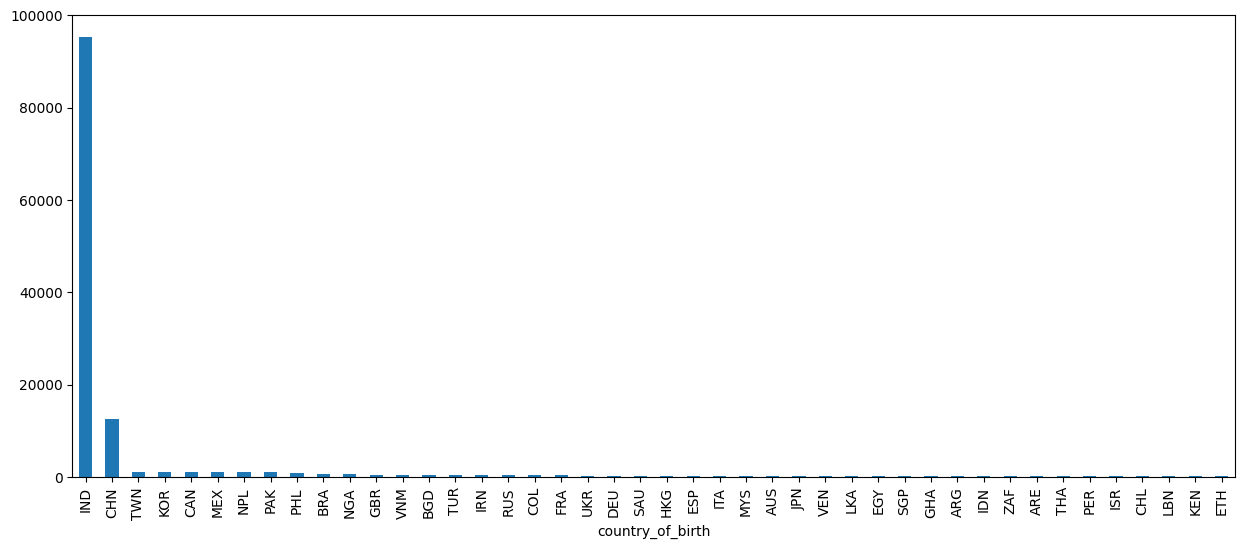

In [11]:
#among those lucky ppl, what's their COB?
selected_df = df_s[df_s['status_type'] == "SELECTED"]
selected_by_country = selected_df['country_of_birth'].value_counts()
filtered_selected_by_country=selected_by_country[selected_by_country>=100]

filtered_selected_by_country.plot(kind='bar', figsize=(15, 6)) #got figsize from chat

<Axes: ylabel='count'>

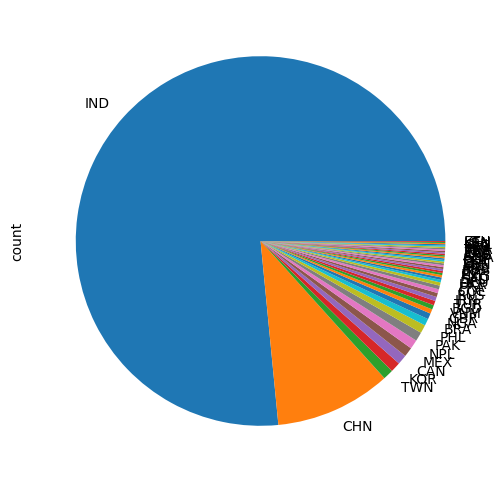

In [12]:
filtered_selected_by_country.plot(kind='pie', figsize=(15, 6))

In [127]:
#how many indians/indian+chinese compared to all selected?

selected_by_country = selected_df['country_of_birth'].value_counts()

#help with chatgpt
total_selected = len(selected_df)
indians_selected = len(selected_df[selected_df['country_of_birth'] == 'IND'])
chinese_selected = len(selected_df[selected_df['country_of_birth'] == 'CHN'])
ratio_indians = indians_selected / total_selected
ratio_indians_chinese = (indians_selected + chinese_selected) / total_selected

ratio_indians, ratio_indians_chinese

(0.7469015310082077, 0.8459506283169884)

## Conclusion2: 26.89% 😇
### And among these 26.89%, 74.69% Indian, 9.90% Chinese.

## Question3: Any repetitive applicants?
### how do i tell this?
#### 1. employer name repetitiveness?

In [78]:
df_s["employer_name"].value_counts()
#lmao i found the agency i interned at, great that they filed H1b

employer_name
Infosys Limited                           16347
Cognizant Technology Solutions US Corp    11014
Tata Consultancy Services Limited         10458
Amazon.com Services LLC                    8926
IBM Corporation                            4742
                                          ...  
Simit Sarayi 1120 LLC                         1
ACURESULT LLC                                 1
FRANCISCO PARTNERS MANAGEMENT, LP             1
Echo Springs Inc.                             1
Isaiah House Inc                              1
Name: count, Length: 44939, dtype: int64

In [85]:
employer_name_value_counts = df_s["employer_name"].value_counts()
filtered_employer_name_value = employer_name_value_counts[employer_name_value_counts >= 100]
print(filtered_employer_name_value)

employer_name
Infosys Limited                             16347
Cognizant Technology Solutions US Corp      11014
Tata Consultancy Services Limited           10458
Amazon.com Services LLC                      8926
IBM Corporation                              4742
                                            ...  
MAXPEP LLC                                    100
ValueLabs, Inc.                               100
Oracle Financial Services Software, Inc.      100
SCOTTLINE LLC                                 100
California Creative Solutions, Inc.           100
Name: count, Length: 673, dtype: int64


##### From Bloomberg: Take Cognizant Technology Solutions Corp., a Teaneck, New Jersey-based corporation whose 344,000-strong workforce is located mostly in India. As lottery entries surged and win rates plunged over the past three years, Cognizant sharply increased the number of visas it sought, according to the H-1B data. That allowed it to keep the number of visas it received roughly constant — even as the company’s overall US employment declined.

<Axes: ylabel='employer_name'>

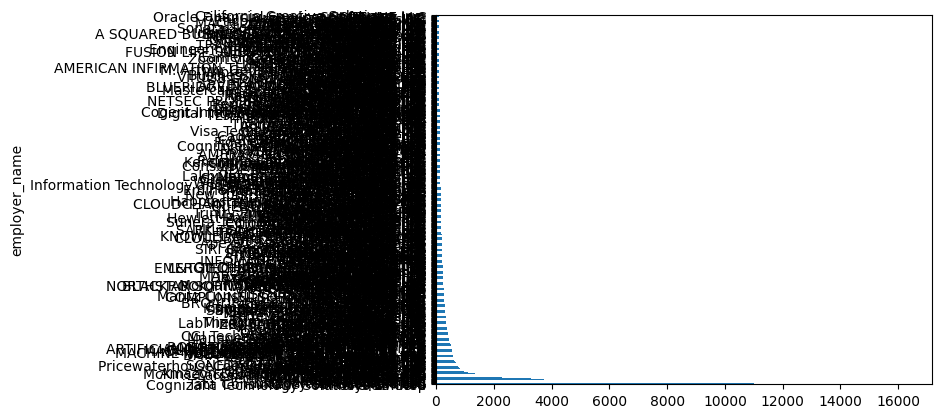

In [86]:
filtered_employer_name_value.plot(kind="barh")

### okay it doesn't work. There are so many companies who look sus, and companies who filed exactly 100 h1b also sus. but needs further investigation.
#### 2. agent name repetitiveness? -> probably highly related with the company too.

In [94]:
df_s["agent_first_name"].value_counts()
df_s['full_name'] = df_s['agent_first_name'] + ' ' + df_s['agent_last_name']
df_s['full_name'].value_counts()

full_name
MITHUN HANDE        11911
Jeremiah Stankus    11715
Amit Jindal          5719
Sharon Rhodes        4742
Jean Taylor          4731
                    ...  
Brianna Mitchell        1
Michael Bauer           1
Jennifer Dunn           1
Angela Tanner           1
Kevin Horn              1
Name: count, Length: 44174, dtype: int64

#### yes, MITHUN HANDE works for infosys.

#### "To identify outsourcing companies, reporters manually labeled over 60 corporate entities associated with about 30 outsourcing companies. Reporters used a combination of manual labeling and statistical analysis to identify more than 3,600 staffing firms."

## Conclusion3: A lot for sure, but needs further investigation.

## Question4: Where are these people based?

In [95]:
df_s["state"].value_counts()

state
TX                         98714
CA                         70557
NJ                         59516
IL                         26438
NY                         22629
WA                         20200
GA                         18184
VA                         17801
MD                         16294
MI                         15421
NC                         14404
FL                         13754
PA                         11330
MA                         11131
NE                          8968
OH                          6435
AZ                          4829
DE                          3471
MN                          3098
SC                          3083
CT                          3009
MO                          2815
TN                          2686
CO                          2420
AR                          1807
IN                          1689
KS                          1515
WI                          1470
UT                          1182
OR                          1062
IA  

#### wow, so many TX. 

In [129]:
df_s["city"].value_counts()

city
Richardson                  17710
New York                    15694
Irving                      13298
Seattle                     13218
Chicago                     13059
                            ...  
Maud                            1
Yardville                       1
Sinton                          1
North Brunswick Township        1
Pageland                        1
Name: count, Length: 4036, dtype: int64

In [147]:
df_s["zip"].value_counts() 
#just double checking. 75082 is Richarson, 98121 Seattle.

zip
75082         16497
98121         11768
77845         11020
20850         10577
94085          5063
              ...  
95035-5417        1
48083-1213        1
81003-3243        1
94403-2353        1
08065-1604        1
Name: count, Length: 23102, dtype: int64

#### As of the 2020 United States census, the city (Richardson) had a total population of 119,469
#### magical Richardson

<Axes: ylabel='city'>

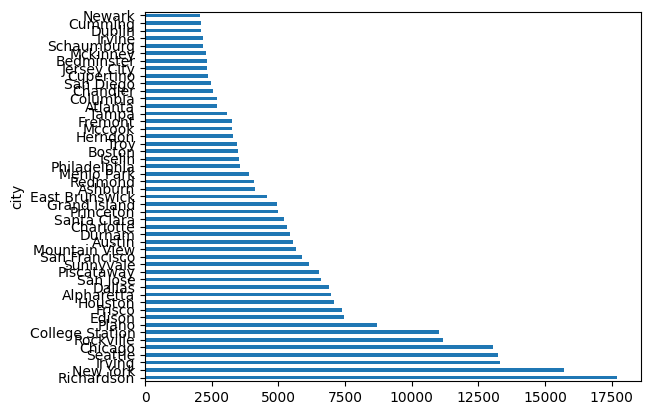

In [36]:
city_count=df_s["city"].value_counts()
filtered_city=city_count[city_count>2000]
filtered_city.plot(kind="barh")

<Axes: ylabel='count'>

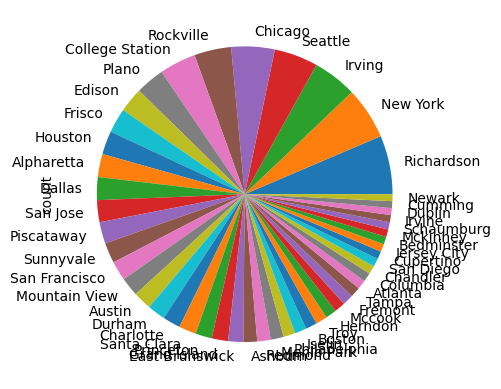

In [37]:
filtered_city.plot(kind="pie")

## Conclusion4: Mostly in Texas, and in Texas mostly in Richarson. Except for Texas, it would be major (and global) cities like NYC, Irving, Seattle, Chicago, Huston, etc.
### Didn't expect conclusion 4 somehow answers my question3.

## Question5: Age range? who's still suffering from h1b

In [175]:
df_s["ben_year_of_birth"].value_counts()

ben_year_of_birth
1993    33708
1994    33668
1995    32889
1992    32307
1996    30183
        ...  
2017        1
2008        1
1944        1
2014        1
2005        1
Name: count, Length: 86, dtype: int64

In [157]:
#convert type first

df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474421 entries, 0 to 474420
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   country_of_birth        474421 non-null  object
 1   country_of_nationality  474421 non-null  object
 2   ben_year_of_birth       474421 non-null  object
 3   gender                  474421 non-null  object
 4   employer_name           474421 non-null  object
 5   city                    474421 non-null  object
 6   state                   474421 non-null  object
 7   zip                     474421 non-null  object
 8   agent_first_name        474158 non-null  object
 9   agent_last_name         473423 non-null  object
 10  status_type             474421 non-null  object
 11  ben_multi_reg_ind       474421 non-null  object
dtypes: object(12)
memory usage: 43.4+ MB


In [23]:
df_s[df_s["ben_year_of_birth"].str.len() != 4]

,country_of_birth,country_of_nationality,ben_year_of_birth,gender,employer_name,city,state,zip,agent_first_name,agent_last_name,status_type,ben_multi_reg_ind
33027,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c)
54049,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c)
76360,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c)
79103,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c)
83943,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c)
...,...,...,...,...,...,...,...,...,...,...,...,...
474416,IND,IND,1989,female,Jefferies LLC,New York,NY,10022-4213,JOCELYN,SIMON,ELIGIBLE,0
474417,IND,IND,1996,female,SparkzIT LLC,Columbus,OH,43235-4678,Atirath,Eleti,ELIGIBLE,1
474418,CHN,CHN,1991,female,NVIDIA Corporation,Santa Clara,CA,95051,Zinab,Sarwary,ELIGIBLE,0
474419,IND,IND,1987,male,Cognizant Technology Solutions US Corp,College Station,TX,77845,Tori,Huet,ELIGIBLE,0


In [34]:
filtered_df = df_s[(df_s["ben_year_of_birth"] > 1973) & (df_s["ben_year_of_birth"] < 2005)]

#### ⬆️ when i firstly run this, it has an error of "ben_year_of_birth"'s value type is object and can't be converted to integer as some values are like "(b)". I then run a command I got from chatgpt but can't reproduce the error anymore. Below is the command.

In [32]:
# Step 1: Use pd.to_numeric to convert, and coerce errors to NaN
df_s["ben_year_of_birth"] = pd.to_numeric(df_s["ben_year_of_birth"], errors='coerce')

# Step 2: Drop rows where 'ben_year_of_birth' is NaN
df_s = df_s.dropna(subset=["ben_year_of_birth"])

# Step 3: Convert the column to integer
df_s["ben_year_of_birth"] = df_s["ben_year_of_birth"].astype(int)

#okay this doesn't work either. I'll go with what Chat told me.


<Axes: ylabel='ben_year_of_birth'>

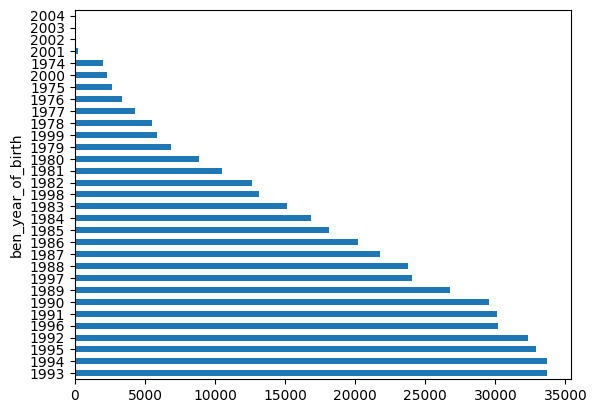

In [47]:
filtered_boy = filtered_df["ben_year_of_birth"].value_counts()
filtered_boy.plot(kind="barh")

In [189]:
filtered_df["ben_year_of_birth"].mean()

np.float64(1989.808422700989)

In [190]:
filtered_df["ben_year_of_birth"].max()

np.int64(2004)

In [192]:
filtered_df["ben_year_of_birth"].min()

np.int64(1974)

In [38]:
filtered_df_larger = df_s[(df_s["ben_year_of_birth"] > 1900) & (df_s["ben_year_of_birth"] < 2024)]

In [41]:
filtered_df_larger["ben_year_of_birth"].max()

np.int64(2022)

In [198]:
filtered_df_larger["ben_year_of_birth"].min()

np.int64(1908)

#### huh?

In [201]:
filtered_df_larger[filtered_df_larger["ben_year_of_birth"]==1908]

,country_of_birth,country_of_nationality,ben_year_of_birth,gender,employer_name,city,state,zip,agent_first_name,agent_last_name,status_type,ben_multi_reg_ind
164021,BOL,HRV,1908,female,"Occoquan Animal Hospital, Inc.",Woodbridge,VA,22191,Lauren,Santangelo,ELIGIBLE,0


In [202]:
filtered_df_larger[filtered_df_larger["ben_year_of_birth"]==2022]

,country_of_birth,country_of_nationality,ben_year_of_birth,gender,employer_name,city,state,zip,agent_first_name,agent_last_name,status_type,ben_multi_reg_ind
8811,IND,IND,2022,female,"Central Business Solutions, Inc.",Newark,CA,94560-3456,Anjul,Katare,ELIGIBLE,0
30625,IND,IND,2022,male,C2S Technologies Inc,Bellevue,WA,98007-4387,Rajesh,Brundala,ELIGIBLE,1
31815,MEX,MEX,2022,male,"GE MEDICAL SYSTEMS, LLC",Norwalk,CT,6851,Donna,Jack,ELIGIBLE,0
161274,COL,COL,2022,female,Tata's Natural Alchemy LLC,Whiting,VT,5778,Alexander,Brigham,ELIGIBLE,0
289100,KWT,IND,2022,male,Cummins Inc.,Nashville,TN,37214-3719,Cory,Warner,ELIGIBLE,1
313550,BGD,BGD,2022,male,Softel Techsource,Plano,TX,75024-5969,Mohammed,Al-Baki,ELIGIBLE,0
337993,IND,IND,2022,male,"Pharmaceutical Research Associates, Inc.",Blue Bell,PA,19422,Connie,Shaffer,ELIGIBLE,0
389843,IND,IND,2022,male,Mark Technologies Inc,Dallas,TX,75234,Rajasekhara,Avula,SELECTED,1
433963,FRA,FRA,2022,male,"Yooz, Inc.",Coppell,TX,75019,Laurent,Charpentier,ELIGIBLE,0
472944,IND,IND,2022,female,PINACLE IT CORP LLC,Dallas,TX,75234,Raju,Gadde,ELIGIBLE,1


#### it's illegal to hire kids.

<Axes: xlabel='ben_year_of_birth'>

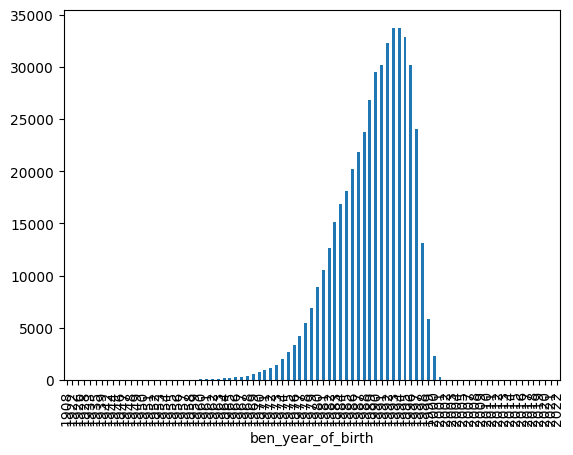

In [54]:
filtered_large_boy=filtered_df_larger["ben_year_of_birth"].value_counts()
filtered_large_boy = filtered_large_boy.sort_index()
filtered_large_boy.plot(kind="bar")

<Axes: xlabel='ben_year_of_birth'>

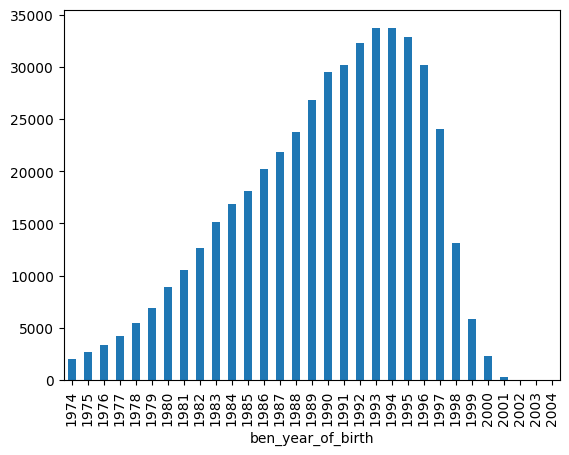

In [55]:
filtered_boy=filtered_boy.sort_index()
filtered_boy.plot(kind="bar")

## Conclusion5: Eldest born 1908 (116 yrs old), youngest born 2022 (2 yrs old).
## Most applicants were born 1980-2000, 24-44 yrs old.
### This also answers question 3 in another way